In [64]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.model_selection import KFold
plt.style.use('fivethirtyeight')
from sklearn.preprocessing import StandardScaler, MinMaxScaler

%matplotlib inline


In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [92]:
df_Stock= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MSFT_historical_data_yfinance.csv')
target= 'Close'
df_Stock['Date'] = pd.to_datetime(df_Stock['Date'])
df_Stock.index=df_Stock['Date']
df_Stock

,Open,High,Low,Close,Volume,Date
Date,,,,,,
2013-12-13,31.509763,31.535026,30.836118,30.895061,40066100,2013-12-13
2013-12-16,30.928732,31.156088,30.768743,31.063461,31734200,2013-12-16
2013-12-17,31.105562,31.248713,30.591910,30.751900,45687700,2013-12-17
2013-12-18,30.617180,30.819271,29.918271,30.802433,63192100,2013-12-18
2013-12-19,30.743483,30.777166,30.381401,30.524549,34160100,2013-12-19
...,...,...,...,...,...,...
2023-12-07,368.230011,371.450012,366.320007,370.950012,23118900,2023-12-07
2023-12-08,369.200012,374.459991,368.230011,374.230011,20144800,2023-12-08
2023-12-11,368.480011,371.600006,366.100006,371.299988,27708800,2023-12-11


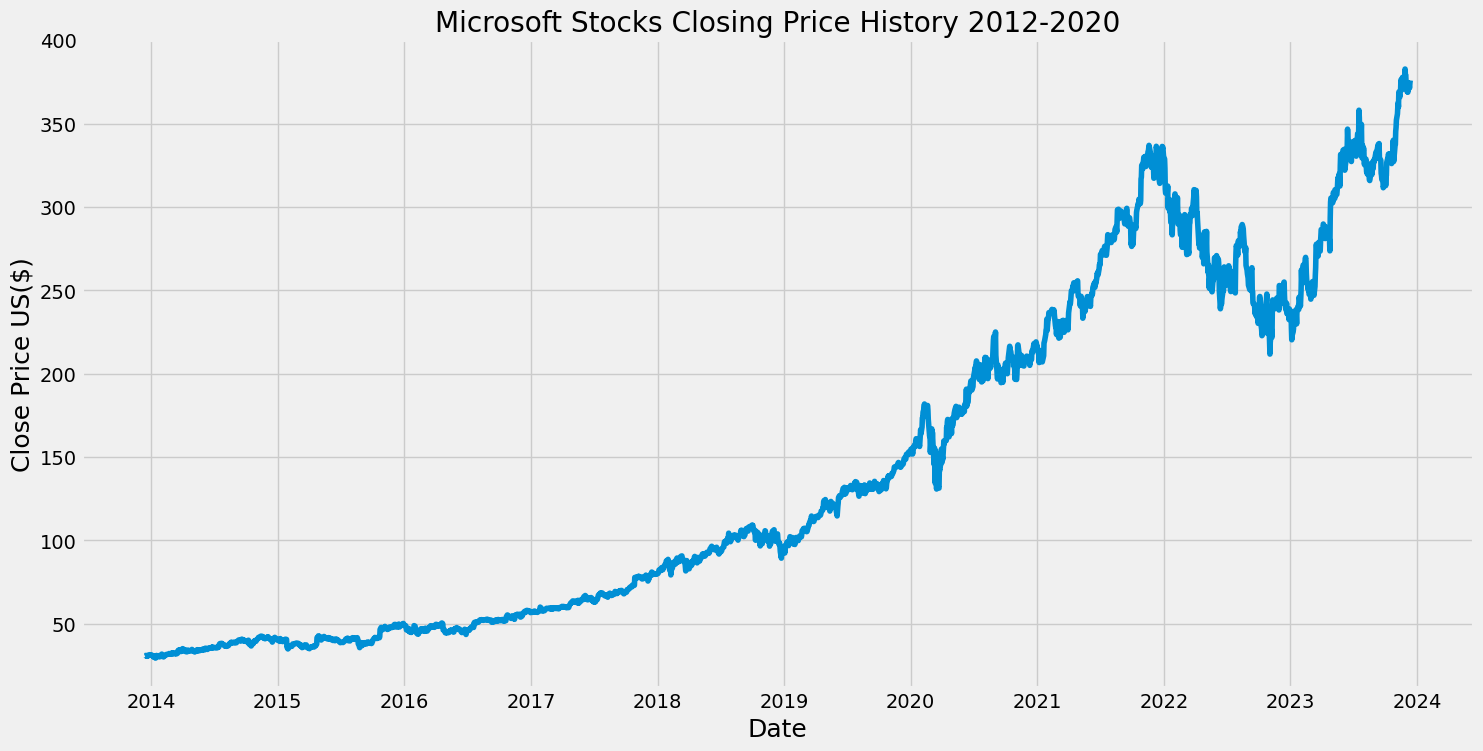

In [47]:
nflx_df=df_Stock[['Date','High','Open','Low','Close','Volume']]
nflx_df.head(10)
plt.figure(figsize=(16,8))
plt.title('Microsoft Stocks Closing Price History 2012-2020')
plt.plot(nflx_df['Date'],nflx_df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price US($)',fontsize=18)
plt.style.use('fivethirtyeight')
plt.show()

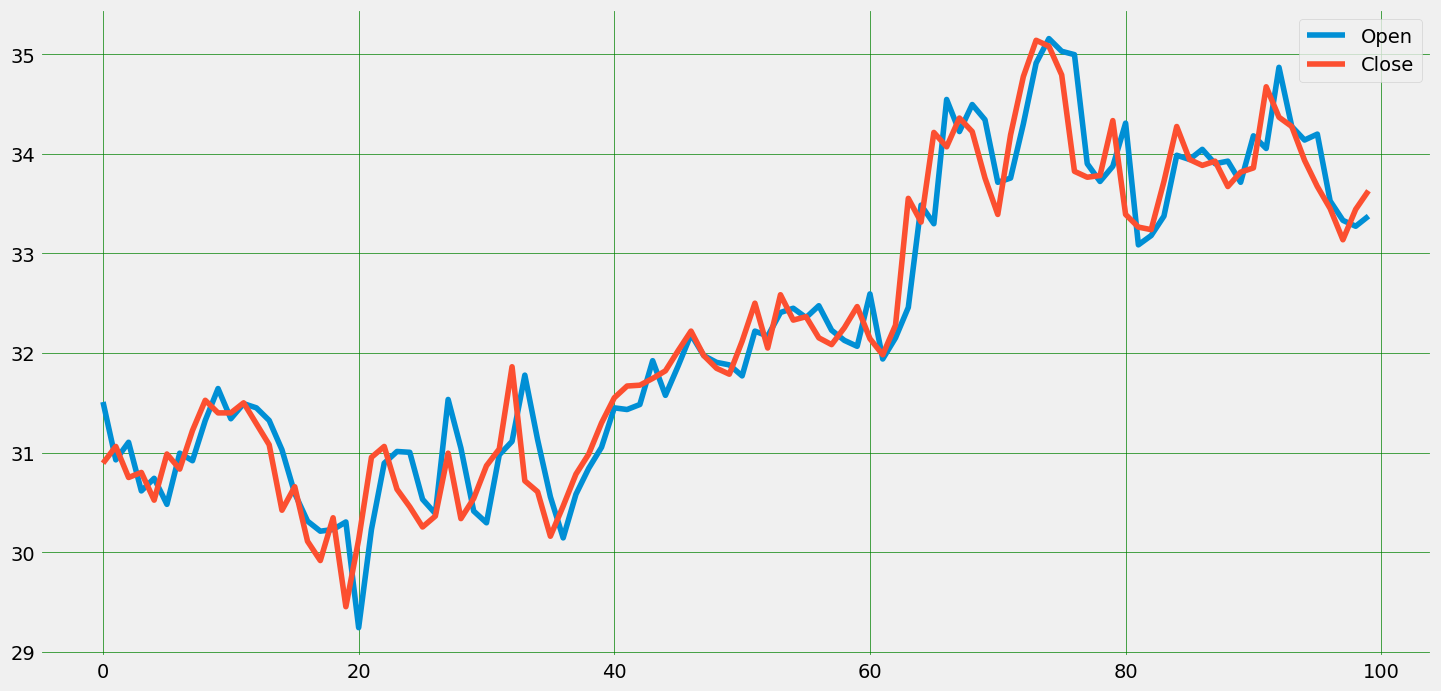

In [48]:
#Plot Open vs Close
nflx_df[['Open','Close']].head(100).plot(kind='line',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


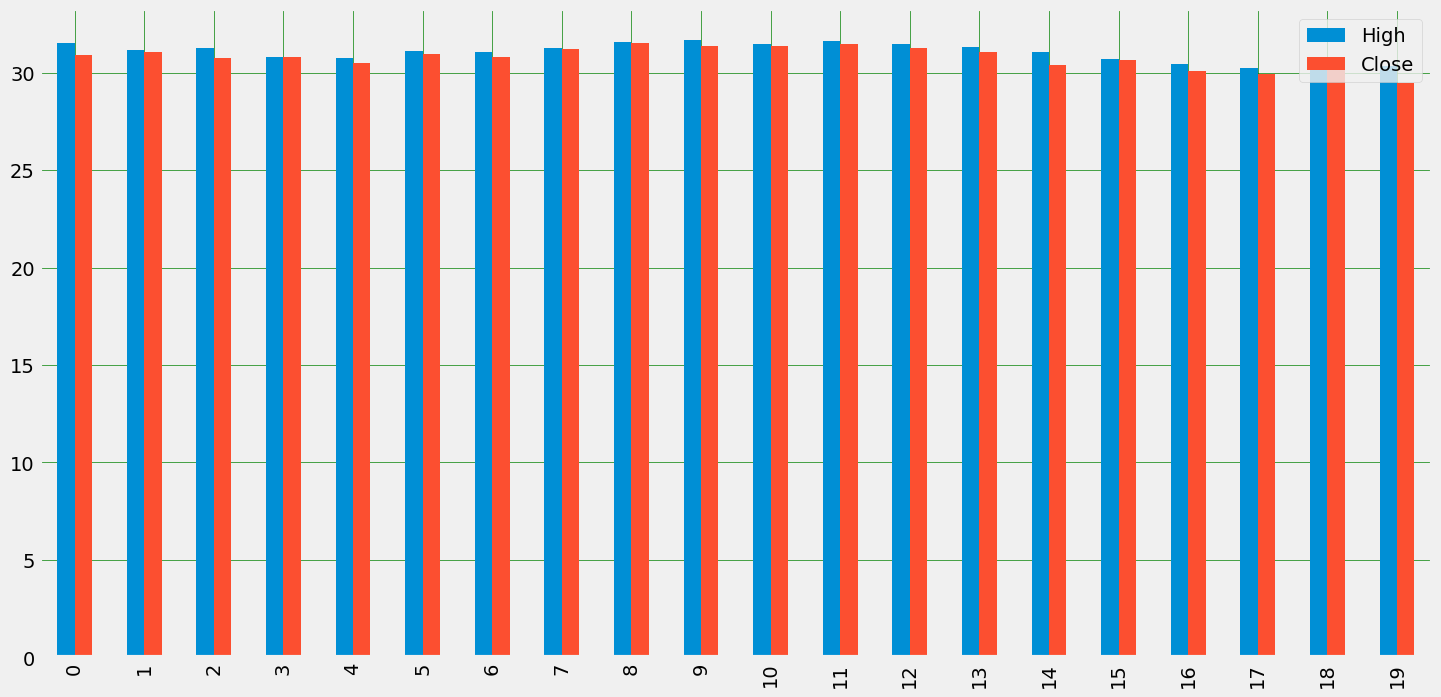

In [49]:
#Plot High vs Close
nflx_df[['High','Close']].head(20).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


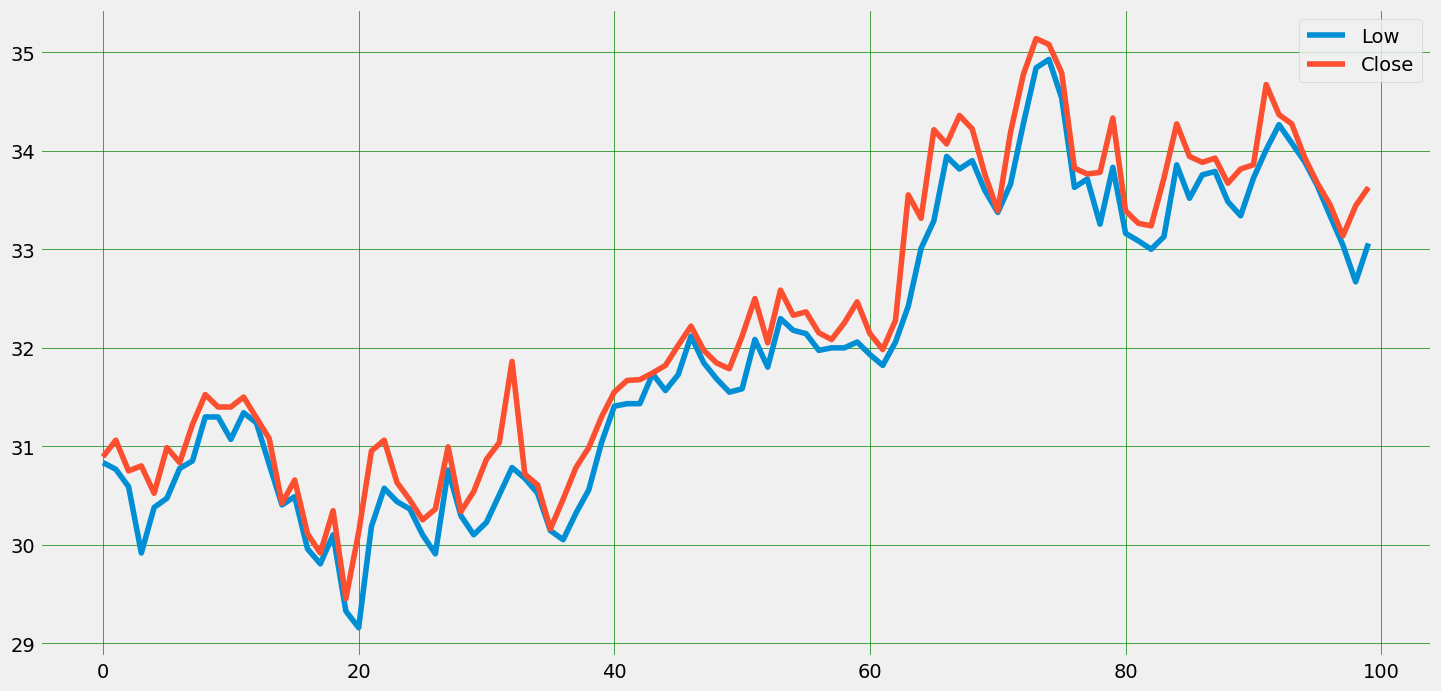

In [50]:
#Plot Low vs Close
nflx_df[['Low','Close']].head(100).plot(kind='line',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [84]:
#separate Independent and dependent variable
X = df_Stock.drop(['Close','Date'],axis=1)
Y= df_Stock['Close']
print(X.head())  #output: (2093, 6)
print(Y.head()) #output: (2093,)

                 Open       High        Low    Volume
Date                                                 
2013-12-13  31.509763  31.535026  30.836118  40066100
2013-12-16  30.928732  31.156088  30.768743  31734200
2013-12-17  31.105562  31.248713  30.591910  45687700
2013-12-18  30.617180  30.819271  29.918271  63192100
2013-12-19  30.743483  30.777166  30.381401  34160100
Date
2013-12-13    30.895061
2013-12-16    31.063461
2013-12-17    30.751900
2013-12-18    30.802433
2013-12-19    30.524549
Name: Close, dtype: float64


In [85]:
scaler= StandardScaler()
scaled_x= scaler.fit_transform(X)

# print(scaled_x)
scaled_x

array([[-1.09836126, -1.10064387, -1.10237503,  0.71141889],
       [-1.1040773 , -1.10433289, -1.10304508,  0.11233698],
       [-1.10233769, -1.10343117, -1.10480372,  1.11562428],
       ...,
       [ 2.21667568,  2.20993268,  2.23188795, -0.17709813],
       [ 2.23999116,  2.23738582,  2.27524884, -0.38668584],
       [ 2.29085228,  2.26869492,  2.32119556, -1.83174643]])

In [86]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(scaled_x,Y,test_size=.2)
print(X_train.shape) #output: (1569, 6)
print(X_test.shape)  #output: (524, 6)
print(Y_train.shape) #output: (1569,)
print(Y_test.shape)  #output: (524,)
#y_test to be evaluated with y_pred for Diff models

(2013, 4)
(504, 4)
(2013,)
(504,)


In [87]:
from sklearn.neighbors import KNeighborsRegressor
knn_regressor=KNeighborsRegressor(n_neighbors = 5)
knn_model=knn_regressor.fit(X_train,Y_train)


In [88]:
Y_test_pred = knn_model.predict(X_test)

In [89]:
knn_kfold = model_selection.KFold(n_splits=10, random_state=100,shuffle=True)
results_kfold = model_selection.cross_val_score(knn_model, scaled_x, Y.astype('int'), cv=knn_kfold)
print('Accuracy: ', results_kfold.mean()*100)

Accuracy:  99.88787172842709


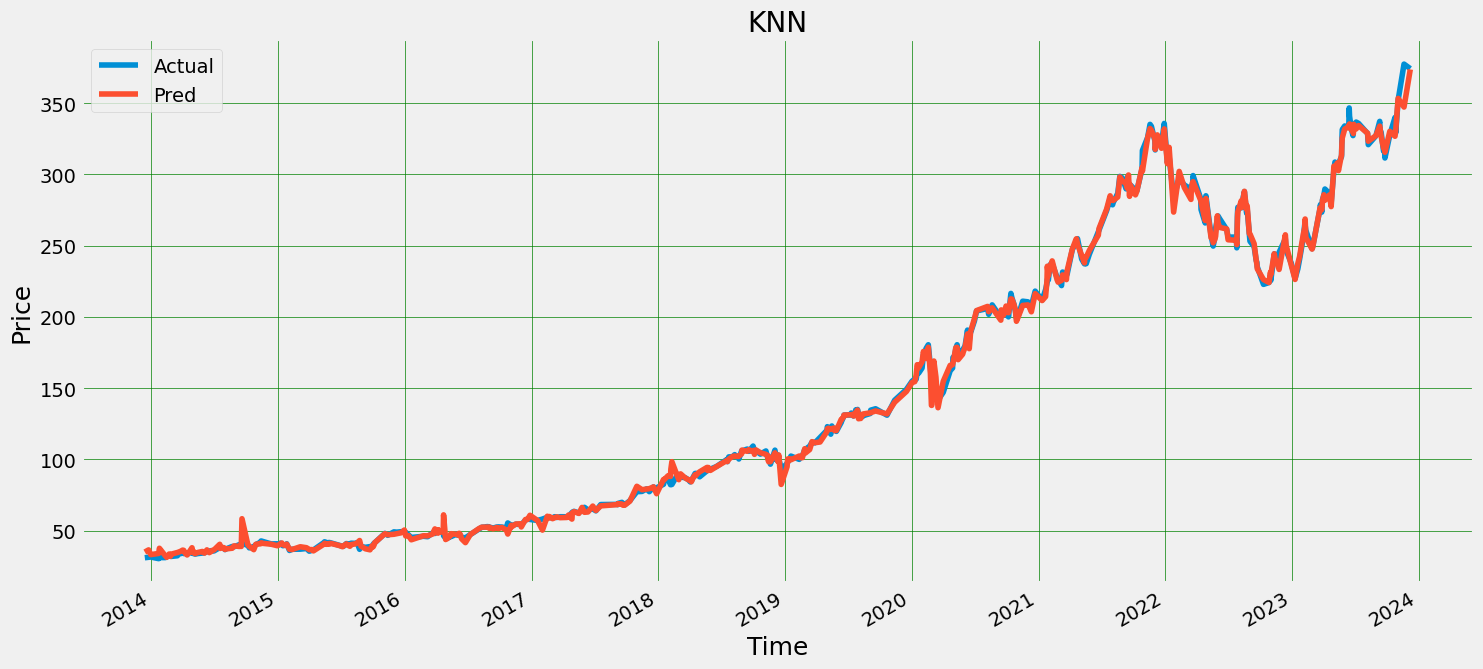

In [90]:
plot_knn_df  = pd.DataFrame({'Actual':Y_test,'Pred':Y_test_pred})
plot_knn_df_sorted = plot_knn_df.sort_index()
plot_knn_df_sorted.plot(kind='line', figsize=(16, 8))  # Use 'line' instead of 'bar'
plt.title('KNN')
plt.ylabel('Price', fontsize=18)
plt.xlabel('Time',fontsize=18)
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [91]:
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error

# Function to calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Function to calculate Root Mean Squared Error (RMSE)
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Function to calculate Test R-squared, Test Explain Variation, Test MAPE, Test MSE, Test RMSE, and Test MAE
def evaluate_model(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    explain_var = explained_variance_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = root_mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)

    return r2, explain_var, mape, mse, rmse, mae

# Use the KNN model to make predictions on the test set
knn_test_predictions = knn_model.predict(X_test)

# Evaluate the model using the test set
test_r2_knn, test_explain_var_knn, test_mape_knn, test_mse_knn, test_rmse_knn, test_mae_knn = evaluate_model(Y_test, knn_test_predictions)

# Print the results
print(f'Test R-squared (KNN): {test_r2_knn:.4f}')
print(f'Test Explain Variation (KNN): {test_explain_var_knn:.4f}')
print(f'Test MAPE (KNN): {test_mape_knn:.4f}%')
print(f'Test Mean Squared Error (MSE) (KNN): {test_mse_knn:.4f}')
print(f'Test Root Mean Squared Error (RMSE) (KNN): {test_rmse_knn:.4f}')
print(f'Test Mean Absolute Error (MAE) (KNN): {test_mae_knn:.4f}')


Test R-squared (KNN): 0.9988
Test Explain Variation (KNN): 0.9988
Test MAPE (KNN): 1.9203%
Test Mean Squared Error (MSE) (KNN): 11.9265
Test Root Mean Squared Error (RMSE) (KNN): 3.4535
Test Mean Absolute Error (MAE) (KNN): 2.0392
